# Text difficulty prediction

Using WCPM, accuracy, comprehension

In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from collections import defaultdict

In [2]:
# df = pd.read_csv('table_for_prediction.csv')

In [3]:
# df['Acc4'] = df.Acc.apply(lambda x: x ** 4)

Span

In [4]:
# session_to_span_proportions = defaultdict(list)
# PERF_MAT_DIR = '../output/performance-matrix/all/'
# for path in [p for p in os.listdir(PERF_MAT_DIR) if '184' in p]:
#     full_path = os.path.join(PERF_MAT_DIR, path)
#     for matrix_path in os.listdir(full_path):
#         session = matrix_path.replace('.tsv', '')
#         matrix_full_path = os.path.join(full_path, matrix_path)
#         matrix = pd.read_csv(matrix_full_path, sep='\t')
#         spanned_tokens = list(matrix.token[1:-1])
#         full_length = len(spanned_tokens)
# #         print(matrix_full_path)
#         while spanned_tokens[0] != spanned_tokens[0]:
#             spanned_tokens = spanned_tokens[1:]
#             if not spanned_tokens:
#                 break
#         if spanned_tokens:
#             while spanned_tokens[-1] != spanned_tokens[-1]:
#                 spanned_tokens = spanned_tokens[:-1]
#                 if not spanned_tokens:
#                     break
#         trimmed_length = len(spanned_tokens)
#         span_proportion = trimmed_length / full_length
#         session_to_span_proportions[session].append(span_proportion)
# df['AvgSpan'] = df.Session.apply(lambda x: np.mean(np.array(session_to_span_proportions[str(x)]) ** 4))
# df.to_csv('table_for_prediction_updated.csv', index=None)

In [43]:
df

,Session,Form,Grade,WCPM,Acc,Comp,Exp,level,WCPM_zscore,Acc_zscore,...,gyorP,gyorQ,mlevel_numeric,form_numeric,mlevel_form_diff,text_is_above_level,Acc4,AvgSpan,AccOverSpanNonSW,DiffTarget
0,13107,Grade4Winter,Grade4,72.0,0.992,2.4,3.4,11,-0.690871,0.517458,...,3,3.0,11,16,-5,0,0.968382,NaN,0.000000,Right
1,13111,Grade4Winter,Grade4,74.0,0.939,3.3,3.3,12,-0.620918,-0.067908,...,3,3.0,12,16,-4,0,0.777432,NaN,0.000000,Right
2,13112,Grade4Winter,Grade4,58.0,0.877,3.7,3.3,10,-1.180540,-0.752676,...,0,2.0,10,16,-6,0,0.591559,NaN,0.000000,Right
3,13113,Grade4Winter,Grade4,57.0,0.854,2.4,3.1,10,-1.215517,-1.006703,...,3,3.0,10,16,-6,0,0.531902,NaN,0.000000,Hard
4,13116,Grade4Winter,Grade4,61.0,0.902,4.4,2.9,10,-1.075611,-0.476560,...,3,2.0,10,16,-6,0,0.661951,NaN,0.000000,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,53803,Grade4Spring,Grade4,122.0,1.000,4.4,3.7,16,0.404977,0.676739,...,3,3.0,16,17,-1,0,1.000000,1.000000,0.967213,Right
1211,53945,Grade1Winter,Grade1,64.0,1.000,7.0,2.2,9,0.007175,0.877031,...,3,3.0,9,6,3,1,1.000000,1.000000,0.909091,Right
1212,54096,Grade4Winter,Grade4,124.0,0.997,5.7,3.6,17,1.127903,0.572681,...,3,3.0,17,16,1,1,0.988054,1.000000,0.921875,Right
1213,54166,Grade4Spring,Grade4,124.0,0.996,6.5,3.6,16,0.461105,0.624682,...,3,3.0,16,17,-1,0,0.984096,1.000000,0.950820,Right


In [5]:
df = pd.read_csv('table_for_prediction_updated.csv')

In [8]:
annotes = pd.read_csv('text-difficulty-avg-annotes.csv')
session_to_avgannote18 = dict(zip(annotes.Session, annotes.DiffTarget))

In [25]:
df = df.loc[df.Session.astype(str).isin(session_to_avgannote18)]
df['DiffTarget'] = df.Session.apply(lambda session: session_to_avgannote18[str(session)])

In [26]:
for (x, y) in itertools.combinations(['WCPM', 'Comp', 'Acc4', 'AvgSpan'], 2):
    print(x, y)
    print('   Overall r = {:.2f}'.format(df[x].corr(df[y])))
    for grade in ['Grade1', 'Grade2', 'Grade3', 'Grade4']:
        grade_df = df.loc[df.Grade == grade]
        print('   {} r = {:.3f}'.format(grade, grade_df[x].corr(grade_df[y])))

WCPM Comp
   Overall r = 0.38
   Grade1 r = 0.391
   Grade2 r = 0.471
   Grade3 r = 0.396
   Grade4 r = 0.438
WCPM Acc4
   Overall r = 0.62
   Grade1 r = 0.654
   Grade2 r = 0.611
   Grade3 r = 0.463
   Grade4 r = 0.540
WCPM AvgSpan
   Overall r = 0.62
   Grade1 r = 0.670
   Grade2 r = 0.608
   Grade3 r = 0.475
   Grade4 r = 0.529
Comp Acc4
   Overall r = 0.49
   Grade1 r = 0.506
   Grade2 r = 0.592
   Grade3 r = 0.561
   Grade4 r = 0.440
Comp AvgSpan
   Overall r = 0.39
   Grade1 r = 0.395
   Grade2 r = 0.462
   Grade3 r = 0.478
   Grade4 r = 0.337
Acc4 AvgSpan
   Overall r = 0.61
   Grade1 r = 0.664
   Grade2 r = 0.560
   Grade3 r = 0.524
   Grade4 r = 0.520


"Spread out" accuracy

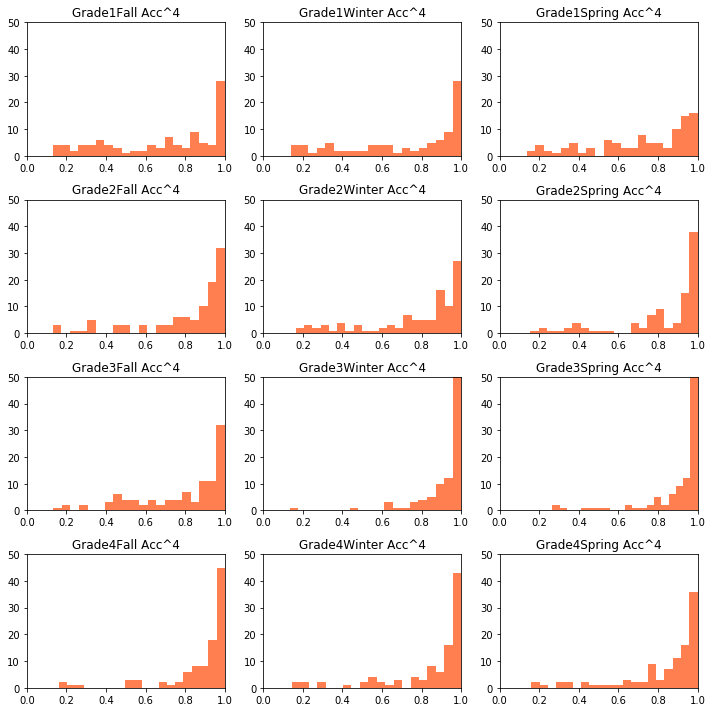

In [27]:
fig, ax =  plt.subplots(4, 3)
fig.set_figheight(10)
fig.set_figwidth(10)

for grade_idx, grade in enumerate(['Grade1', 'Grade2', 'Grade3', 'Grade4']):
    for term_idx, term in enumerate(['Fall', 'Winter', 'Spring']):
        form = grade + term
        accs = np.array(df.loc[df.Form == form].Acc4)
        
        ax[grade_idx][term_idx].hist(accs, bins=20, color='coral')
        ax[grade_idx][term_idx].set_title(form + ' Acc^4')
        ax[grade_idx][term_idx].set_xlim(0, 1)
        ax[grade_idx][term_idx].set_ylim(0, 50)
plt.tight_layout()
#     break

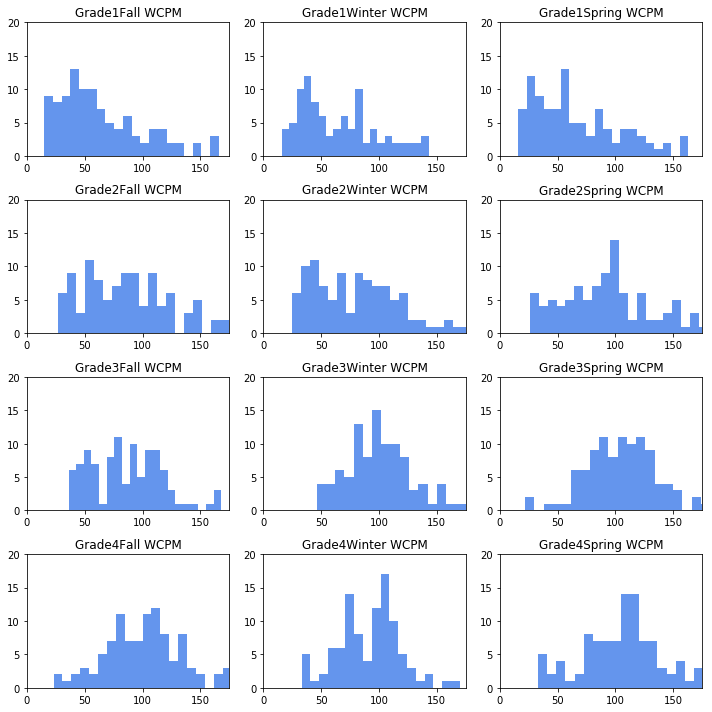

In [28]:
fig, ax =  plt.subplots(4, 3)
fig.set_figheight(10)
fig.set_figwidth(10)

for grade_idx, grade in enumerate(['Grade1', 'Grade2', 'Grade3', 'Grade4']):
    for term_idx, term in enumerate(['Fall', 'Winter', 'Spring']):
        form = grade + term
        wcpm = np.array(df.loc[df.Form == form].WCPM)
        
        ax[grade_idx][term_idx].hist(wcpm, bins=20, color='cornflowerblue')
        ax[grade_idx][term_idx].set_title(form + ' WCPM')
        ax[grade_idx][term_idx].set_xlim(0, 175)
        ax[grade_idx][term_idx].set_ylim(0, 20)
plt.tight_layout()
#     break

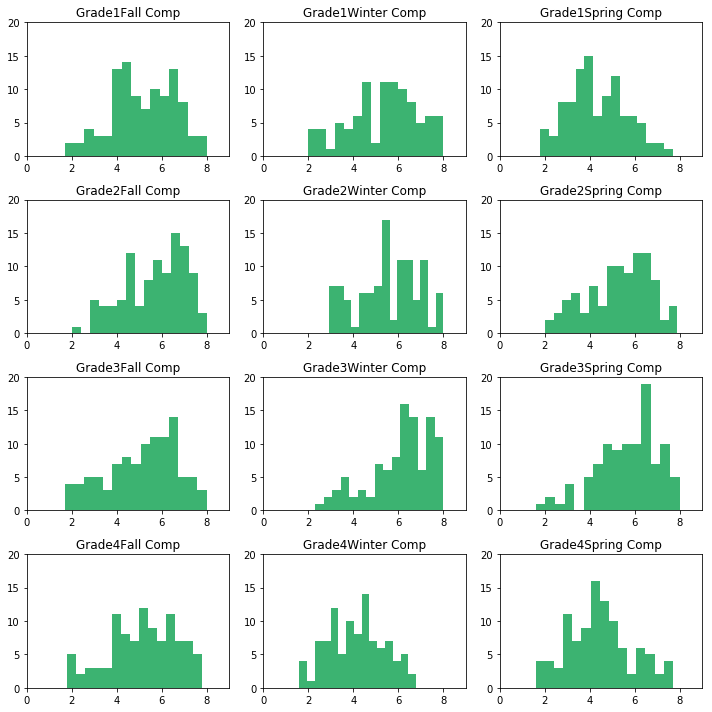

In [29]:
fig, ax =  plt.subplots(4, 3)
fig.set_figheight(10)
fig.set_figwidth(10)

for grade_idx, grade in enumerate(['Grade1', 'Grade2', 'Grade3', 'Grade4']):
    for term_idx, term in enumerate(['Fall', 'Winter', 'Spring']):
        form = grade + term
        comp = np.array(df.loc[df.Form == form].Comp)
        
        ax[grade_idx][term_idx].hist(comp, bins=15, color='mediumseagreen')
        ax[grade_idx][term_idx].set_title(form + ' Comp')
        ax[grade_idx][term_idx].set_xlim(0, 9)
        ax[grade_idx][term_idx].set_ylim(0, 20)
plt.tight_layout()
#     break

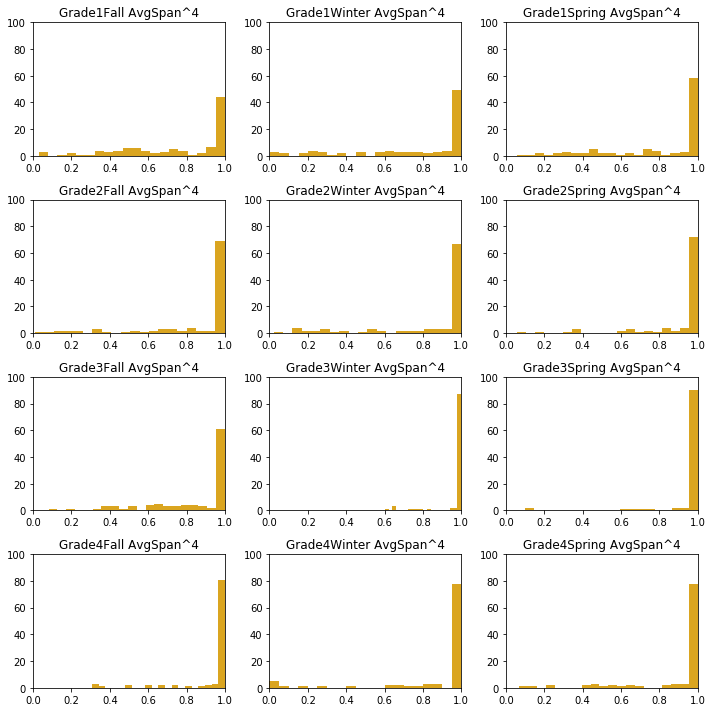

In [30]:
fig, ax =  plt.subplots(4, 3)
fig.set_figheight(10)
fig.set_figwidth(10)

for grade_idx, grade in enumerate(['Grade1', 'Grade2', 'Grade3', 'Grade4']):
    for term_idx, term in enumerate(['Fall', 'Winter', 'Spring']):
        form = grade + term
        accs = np.array(df.loc[df.Form == form].AvgSpan)
        accs = np.array([x if x == x else 0 for x in accs])
        ax[grade_idx][term_idx].hist(accs, bins=20, color='goldenrod')
        ax[grade_idx][term_idx].set_title(form + ' AvgSpan^4')
        ax[grade_idx][term_idx].set_xlim(0, 1)
        ax[grade_idx][term_idx].set_ylim(0, 100)
plt.tight_layout()
#     break

In [34]:
def plot_two_features_all_sessions(feature_1, feature_2):
    plt.figure(figsize=(8, 8))
    for gyor_numeric_value, gyor_color, gyor_marker in zip(
        ['Right', 'Easy', 'Hard'], 
        ['lightgreen', 'gold', 'firebrick'], 
        ['+', 's', 'x']):
        df_selected = df.loc[df.DiffTarget == gyor_numeric_value]
        feature_1_column = df_selected[feature_1]
        feature_2_column = df_selected[feature_2]
        plt.title(feature_1 + ', ' + feature_2 + ', all sessions')
        plt.xlabel(feature_1)
        plt.ylabel(feature_2)
        plt.scatter(
            feature_1_column,
            feature_2_column,
            color=gyor_color,
            marker=gyor_marker,
            alpha=.5,
            label=gyor_numeric_value
        )
        print(gyor_numeric_value, len(feature_1_column))
    print('n =', df.shape[0])
    plt.legend()

Right 640
Easy 373
Hard 190
n = 1203


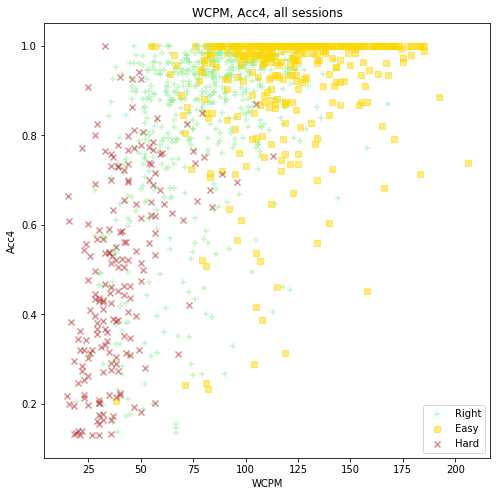

In [35]:
plot_two_features_all_sessions('WCPM', 'Acc4')

Right 640
Easy 373
Hard 190
n = 1203


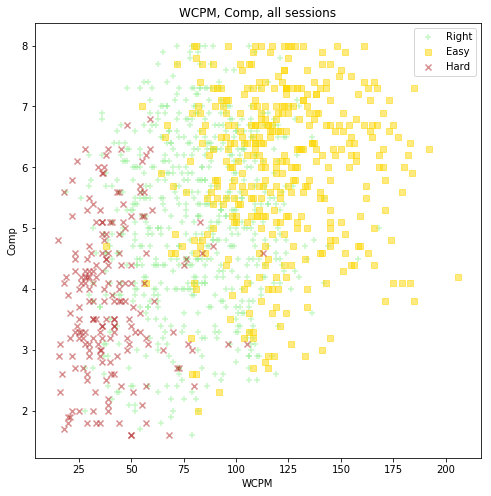

In [36]:
plot_two_features_all_sessions('WCPM', 'Comp')

Right 640
Easy 373
Hard 190
n = 1203


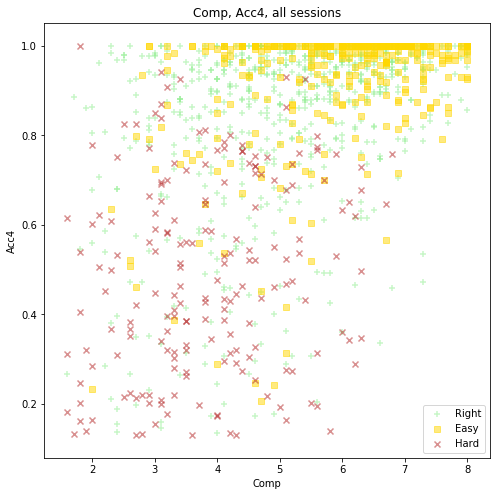

In [37]:
plot_two_features_all_sessions('Comp', 'Acc4')

Right 640
Easy 373
Hard 190
n = 1203


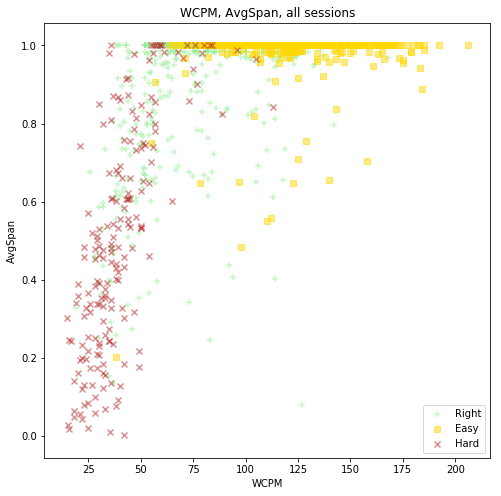

In [38]:
plot_two_features_all_sessions('WCPM', 'AvgSpan')

In [41]:
def plot_two_features_by_grade(feature_1, feature_2):
    fig, ax = plt.subplots(1, 4)
    fig.set_figwidth(20)
    for grade_idx, grade in enumerate(['Grade1', 'Grade2', 'Grade3', 'Grade4']):
#         plt.figure(figsize=(8, 8))
        for gyor_numeric_value, gyor_color, gyor_marker in zip(
        ['Right', 'Easy', 'Hard'], 
        ['lightgreen', 'gold', 'firebrick'], 
        ['+', 's', 'x']):
            df_selected = df.loc[df.Grade == grade]
            if gyor_numeric_value == 3:
                print(df_selected.shape[0])
            df_selected = df_selected.loc[df_selected.DiffTarget == gyor_numeric_value]
            print(grade, gyor_numeric_value, df_selected.shape[0])
            feature_1_column = df_selected[feature_1]
            feature_2_column = df_selected[feature_2]
            ax[grade_idx].set_title(feature_1 + ', ' + feature_2 + ', ' + grade)
            ax[grade_idx].set_xlabel(feature_1)
            ax[grade_idx].set_ylabel(feature_2)
            ax[grade_idx].scatter(
                feature_1_column,
                feature_2_column,
                color=gyor_color,
                marker=gyor_marker,
                alpha=.5,
                label=gyor_numeric_value
            )
    plt.legend()
    plt.show()

Grade1 Right 130
Grade1 Easy 91
Grade1 Hard 76
Grade2 Right 152
Grade2 Easy 97
Grade2 Hard 54
Grade3 Right 168
Grade3 Easy 109
Grade3 Hard 25
Grade4 Right 190
Grade4 Easy 76
Grade4 Hard 35


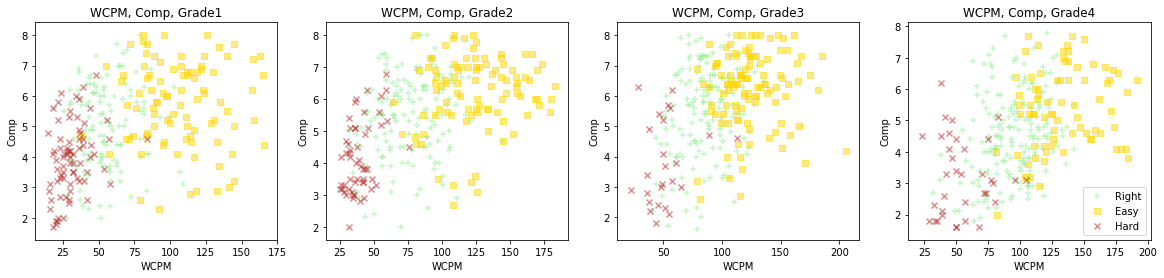

Grade1 Right 130
Grade1 Easy 91
Grade1 Hard 76
Grade2 Right 152
Grade2 Easy 97
Grade2 Hard 54
Grade3 Right 168
Grade3 Easy 109
Grade3 Hard 25
Grade4 Right 190
Grade4 Easy 76
Grade4 Hard 35


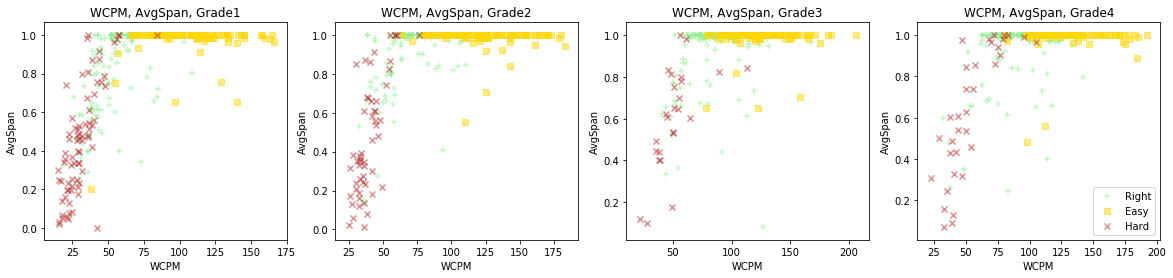

Grade1 Right 130
Grade1 Easy 91
Grade1 Hard 76
Grade2 Right 152
Grade2 Easy 97
Grade2 Hard 54
Grade3 Right 168
Grade3 Easy 109
Grade3 Hard 25
Grade4 Right 190
Grade4 Easy 76
Grade4 Hard 35


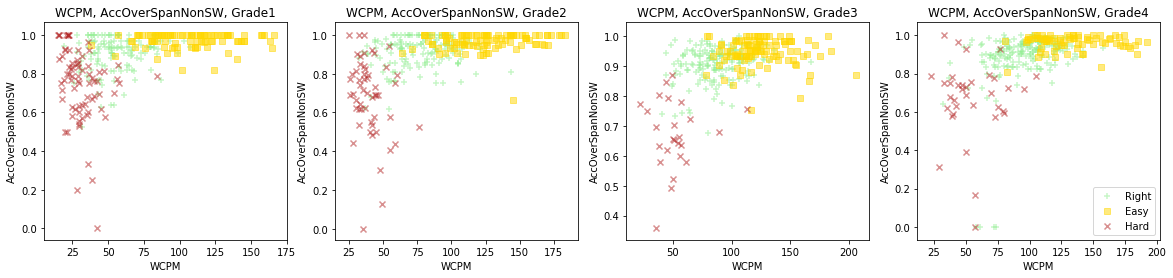

Grade1 Right 130
Grade1 Easy 91
Grade1 Hard 76
Grade2 Right 152
Grade2 Easy 97
Grade2 Hard 54
Grade3 Right 168
Grade3 Easy 109
Grade3 Hard 25
Grade4 Right 190
Grade4 Easy 76
Grade4 Hard 35


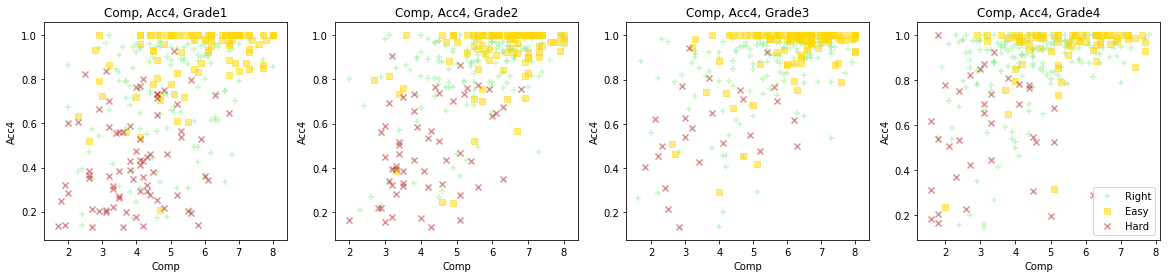

In [44]:
plot_two_features_by_grade('WCPM', 'Comp')
plot_two_features_by_grade('WCPM', 'AvgSpan')
plot_two_features_by_grade('WCPM', 'AccOverSpanNonSW')
plot_two_features_by_grade('Comp', 'Acc4')